开始模拟两种加密货币的成长过程 (目标节点数: 500)...
模拟完成。正在绘制对比图表...


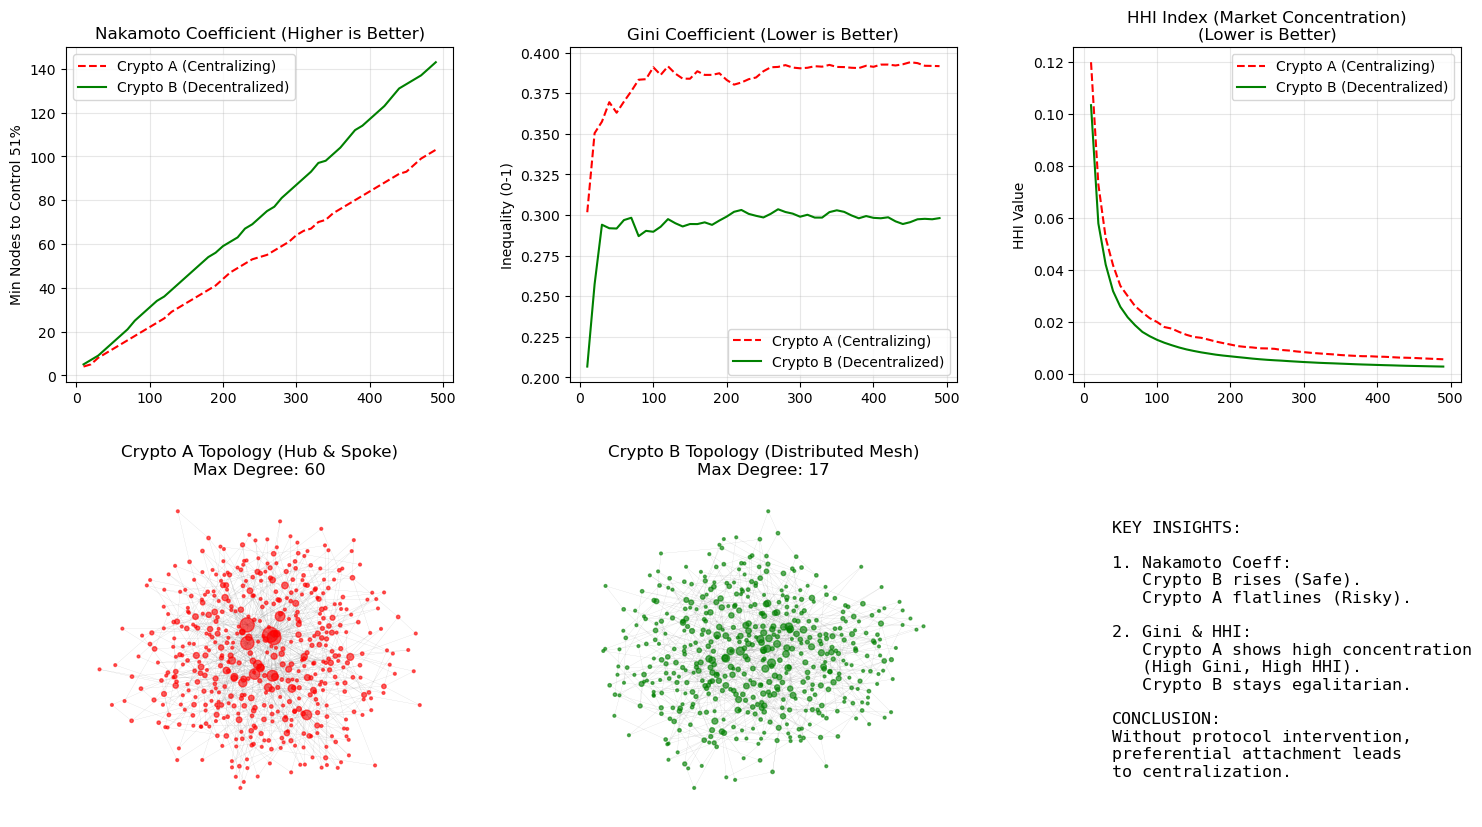

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# ==========================================
# 1. 定义大纲要求的检测指标 (Metrics from Syllabus)
# ==========================================
def calculate_metrics(G):
    degrees = np.array([d for n, d in G.degree()])
    if len(degrees) == 0: return 0, 0, 0
    
    n = len(degrees)
    
    # --- Nakamoto Coefficient (中本聪系数) ---
    sorted_deg = np.sort(degrees)[::-1]
    total_deg = np.sum(degrees)
    current_sum = 0
    nakamoto = 0
    for d in sorted_deg:
        current_sum += d
        nakamoto += 1
        if current_sum > total_deg * 0.51:
            break
            
    # --- Gini Coefficient (基尼系数) ---
    sorted_asc = np.sort(degrees)
    cum_deg = np.cumsum(sorted_asc)
    if cum_deg[-1] == 0: 
        gini = 0
    else:
        gini = (n + 1 - 2 * np.sum(cum_deg) / cum_deg[-1]) / n
        
    # --- HHI (Herfindahl-Hirschman Index) ---
    # 市场集中度
    shares = degrees / total_deg if total_deg > 0 else degrees
    hhi = np.sum(shares ** 2)
    
    return nakamoto, gini, hhi

# ==========================================
# 2. 模拟成长过程 (Growth Simulation)
# ==========================================

# 初始设置
final_size = 500  # 最终增长到多少个节点
m_edges = 2       # 每个新节点带来几条边

# 初始化两个网络
G_centralized = nx.complete_graph(5)   # 场景A: 走向中心化
G_decentralized = nx.complete_graph(5) # 场景B: 保持去中心化

# 记录历史数据
history = {
    'time': [],
    'A_nakamoto': [], 'A_gini': [], 'A_hhi': [],
    'B_nakamoto': [], 'B_gini': [], 'B_hhi': []
}

print(f"开始模拟两种加密货币的成长过程 (目标节点数: {final_size})...")

for t in range(5, final_size):
    # --- 场景 A: 优先连接 (Rich-get-Richer) ---
    targets_A = []
    degrees_A = [d for n, d in G_centralized.degree()]
    probs_A = np.array(degrees_A) / sum(degrees_A)
    targets_A = np.random.choice(G_centralized.nodes(), size=m_edges, p=probs_A, replace=False)
    
    new_node_A = max(G_centralized.nodes()) + 1
    G_centralized.add_node(new_node_A)
    for target in targets_A:
        G_centralized.add_edge(new_node_A, target)

    # --- 场景 B: 随机/均匀连接 (Decentralized Protocol) ---
    existing_nodes_B = list(G_decentralized.nodes())
    targets_B = random.sample(existing_nodes_B, m_edges)
    
    new_node_B = max(G_decentralized.nodes()) + 1
    G_decentralized.add_node(new_node_B)
    for target in targets_B:
        G_decentralized.add_edge(new_node_B, target)
        
    # --- 记录指标 ---
    if t % 10 == 0:
        nk_A, gini_A, hhi_A = calculate_metrics(G_centralized)
        nk_B, gini_B, hhi_B = calculate_metrics(G_decentralized)
        
        history['time'].append(t)
        history['A_nakamoto'].append(nk_A)
        history['A_gini'].append(gini_A)
        history['A_hhi'].append(hhi_A)
        history['B_nakamoto'].append(nk_B)
        history['B_gini'].append(gini_B)
        history['B_hhi'].append(hhi_B)

print("模拟完成。正在绘制对比图表...")

# ==========================================
# 3. 可视化对比 (包含 HHI)
# ==========================================

# 调整布局为 2行 3列，以容纳新增的 HHI 图表
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# --- 第一行: 数学指标 ---

# 1. Nakamoto Coefficient
axes[0,0].plot(history['time'], history['A_nakamoto'], 'r--', label='Crypto A (Centralizing)')
axes[0,0].plot(history['time'], history['B_nakamoto'], 'g-', label='Crypto B (Decentralized)')
axes[0,0].set_title("Nakamoto Coefficient (Higher is Better)")
axes[0,0].set_ylabel("Min Nodes to Control 51%")
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Gini Coefficient
axes[0,1].plot(history['time'], history['A_gini'], 'r--', label='Crypto A (Centralizing)')
axes[0,1].plot(history['time'], history['B_gini'], 'g-', label='Crypto B (Decentralized)')
axes[0,1].set_title("Gini Coefficient (Lower is Better)")
axes[0,1].set_ylabel("Inequality (0-1)")
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. HHI (新增)
axes[0,2].plot(history['time'], history['A_hhi'], 'r--', label='Crypto A (Centralizing)')
axes[0,2].plot(history['time'], history['B_hhi'], 'g-', label='Crypto B (Decentralized)')
axes[0,2].set_title("HHI Index (Market Concentration)\n(Lower is Better)")
axes[0,2].set_ylabel("HHI Value")
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# --- 第二行: 拓扑结构与总结 ---

# 4. Topology A
pos_A = nx.spring_layout(G_centralized, iterations=20, seed=42)
d_A = [d for n, d in G_centralized.degree()]
axes[1,0].set_title(f"Crypto A Topology (Hub & Spoke)\nMax Degree: {max(d_A)}")
nx.draw(G_centralized, pos_A, ax=axes[1,0], node_size=[v*2 for v in d_A], 
        node_color='red', alpha=0.6, edge_color='gray', width=0.1)

# 5. Topology B
pos_B = nx.spring_layout(G_decentralized, iterations=20, seed=42)
d_B = [d for n, d in G_decentralized.degree()]
axes[1,1].set_title(f"Crypto B Topology (Distributed Mesh)\nMax Degree: {max(d_B)}")
nx.draw(G_decentralized, pos_B, ax=axes[1,1], node_size=[v*2 for v in d_B], 
        node_color='green', alpha=0.6, edge_color='gray', width=0.1)

# 6. 文字总结 (填补右下角空白)
axes[1,2].axis('off')
summary_text = (
    "KEY INSIGHTS:\n\n"
    "1. Nakamoto Coeff:\n"
    "   Crypto B rises (Safe).\n"
    "   Crypto A flatlines (Risky).\n\n"
    "2. Gini & HHI:\n"
    "   Crypto A shows high concentration\n"
    "   (High Gini, High HHI).\n"
    "   Crypto B stays egalitarian.\n\n"
    "CONCLUSION:\n"
    "Without protocol intervention,\n"
    "preferential attachment leads\n"
    "to centralization."
)
axes[1,2].text(0.1, 0.5, summary_text, fontsize=12, family='monospace', va='center')

plt.savefig('crypto_simulation_hhi.png', dpi=300, bbox_inches='tight')
plt.show()